# Task 1: Data preparation and customer analytics

Here is your task
We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review. However, to do so, we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.  

To get started, download the resource csv data files below and begin performing high-level data checks such as:

Creating and interpreting high-level summaries of the data
Finding outliers and removing these (if applicable)
Checking data formats and correcting (if applicable)

You will also want to derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment. Remember, our end goal is to form a strategy based on the findings to provide a clear recommendation to Julia the Category Manager so make sure your insights can have a commercial application.

As we are in the early stages of this analysis Zilinka has asked us to submit our initial findings, so please save your code as a .pdf file and upload it to unlock the model answer.

Note: that this is an open-ended case study that can be approached in many ways. Example answer is in R. 

LIFESTAGE: Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.

PREMIUM_CUSTOMER: Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.

Pro analytics Tip: While the data set would not normally be considered large some operations may still take some time to run. 

This is normal and to be expected when dealing with data sets at Quantium. Whilst your analysis is based on the whole data set you may want to try some strategies to try running sample solutions on a smaller subset of data I.e. create a sample solution using some of the data while it uploads.



# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [6]:
purchase_behaviour_df = pd.read_csv('./QVI_purchase_behaviour.csv')
transaction_data_df = pd.read_csv('./QVI_transaction_data.csv')

In [7]:
purchase_behaviour_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [8]:
transaction_data_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


# High-Level Data Checks

**Data Summary using info() and describe()**

In [11]:
print("Purchase Behavior Data:")
purchase_behaviour_df.info()
print("\n")
print("Transaction Data:")
transaction_data_df.info()

Purchase Behavior Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


Transaction Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float6

In [12]:
print("Purchase Behavior Data:")
purchase_behaviour_df.describe()

Purchase Behavior Data:


,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [13]:
print("Transaction Data:")
transaction_data_df.describe()

Transaction Data:


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


**Check Missing Values**

In [15]:
print("Purchase Behavior Data:")
purchase_behaviour_df.isnull().sum()

Purchase Behavior Data:


LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [16]:
print("Transaction Data:")
transaction_data_df.isnull().sum()

Transaction Data:


DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

# Convert DATE column to datetime format

In [18]:
# Convert DATE column to datetime
transaction_data_df['DATE'] = pd.to_datetime(transaction_data_df['DATE'], origin='1899-12-30', unit='D')

In [19]:
# Counting transactions per date
transactions_by_date = transaction_data_df.groupby('DATE').size()

In [20]:
# Creating a complete date range
date_range = pd.date_range(start='2018-07-01', end='2019-06-30')

In [21]:
# Finding missing dates
missing_dates = date_range.difference(transactions_by_date.index)
print("Missing Dates:", missing_dates)

Missing Dates: DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)


In [22]:
transaction_data_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


# Detecting Outliers

**Finding Outliers in Product Quantity**

In [27]:
# Identifying the outlier (e.g., 200 packets in a transaction)
outliers = transaction_data_df[transaction_data_df['PROD_QTY'] >= 200]
outliers


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [28]:
# Checking transactions of the customer with 200-chip purchase
customer_id = outliers['LYLTY_CARD_NBR'].iloc[0]
customer_transactions = transaction_data_df[transaction_data_df['LYLTY_CARD_NBR'] == customer_id]
customer_transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [29]:
# Filter out the outlier customer based on the loyalty card number
transaction_data_df = transaction_data_df[transaction_data_df['LYLTY_CARD_NBR'] != customer_id]

# Feature Engineering

**Extract Pack Size**

In [32]:
#transaction_data_df['PACK_SIZE'] = transaction_data_df['PROD_NAME'].str.extract(r'(\d+)(?=g)')[0].astype(float)

# Extracting pack size (numbers) from `PROD_NAME`
transaction_data_df['PACK_SIZE'] = transaction_data_df['PROD_NAME'].str.extract(r'(\d+)').astype(float)

In [33]:
# Checking pack size distribution
transaction_data_df['PACK_SIZE'].value_counts().sort_index()

PACK_SIZE
70.0      1507
90.0      3008
110.0    22387
125.0     1454
134.0    25102
135.0     3257
150.0    43131
160.0     2970
165.0    15297
170.0    19983
175.0    66390
180.0     1468
190.0     2995
200.0     4473
210.0     6272
220.0     1564
250.0     3169
270.0     6285
300.0    15166
330.0    12540
380.0     6416
Name: count, dtype: int64

**Extract Brand Name (first word of product name)**

In [35]:
# Summary of product names
transaction_data_df['PROD_NAME'].describe()

count                                     264834
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [36]:
# Number of unique product names
transaction_data_df['PROD_NAME'].nunique()

114

**Checking if all products are chips using text analysis**

In [38]:
import re

# Extracting words from product names
product_words = transaction_data_df['PROD_NAME'].str.split().explode()

# Removing words that contain digits or special characters
product_words = product_words[product_words.str.match(r'^[a-zA-Z]+$')]

# Counting word occurrences
word_counts = product_words.value_counts()
print(word_counts)


PROD_NAME
Chips      49770
Kettle     41288
Smiths     28860
Salt       27976
Cheese     27890
           ...  
Whlegrn     1432
Pc          1431
NCC         1419
Garden      1419
Fries       1418
Name: count, Length: 168, dtype: int64


**Filtering out non-chip products (e.g., salsa)**

In [40]:
transaction_data_df = transaction_data_df[~transaction_data_df['PROD_NAME'].str.contains("salsa", case=False)]

**Extracting Brand Name**

In [42]:
# Extracting brand (first word in `PROD_NAME`)
transaction_data_df['BRAND'] = transaction_data_df['PROD_NAME'].str.split().str[0]

In [43]:
# Cleaning brand names
transaction_data_df['BRAND'] = transaction_data_df['BRAND'].replace({"RED": "RRD"})

In [44]:
transaction_data_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle


# Merge DataFrames

In [46]:
merged_df = transaction_data_df.merge(purchase_behaviour_df, on='LYLTY_CARD_NBR', how='left')

In [102]:
merged_df.head(50)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget
5,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70,330.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
6,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.60,210.0,Grain,MIDAGE SINGLES/COUPLES,Budget
7,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.90,150.0,Doritos,MIDAGE SINGLES/COUPLES,Budget
8,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.20,210.0,Grain,MIDAGE SINGLES/COUPLES,Budget
9,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70,330.0,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [48]:
# Save merged data to CSV
merged_df.to_csv("merged_data.csv", index=False)

# Customer Segment Analysis

In [50]:
customer_spend = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
customer_avg_spend = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().reset_index()
customer_quantity = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()
customers_by_segment = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
units_per_customer = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()

# Visualization

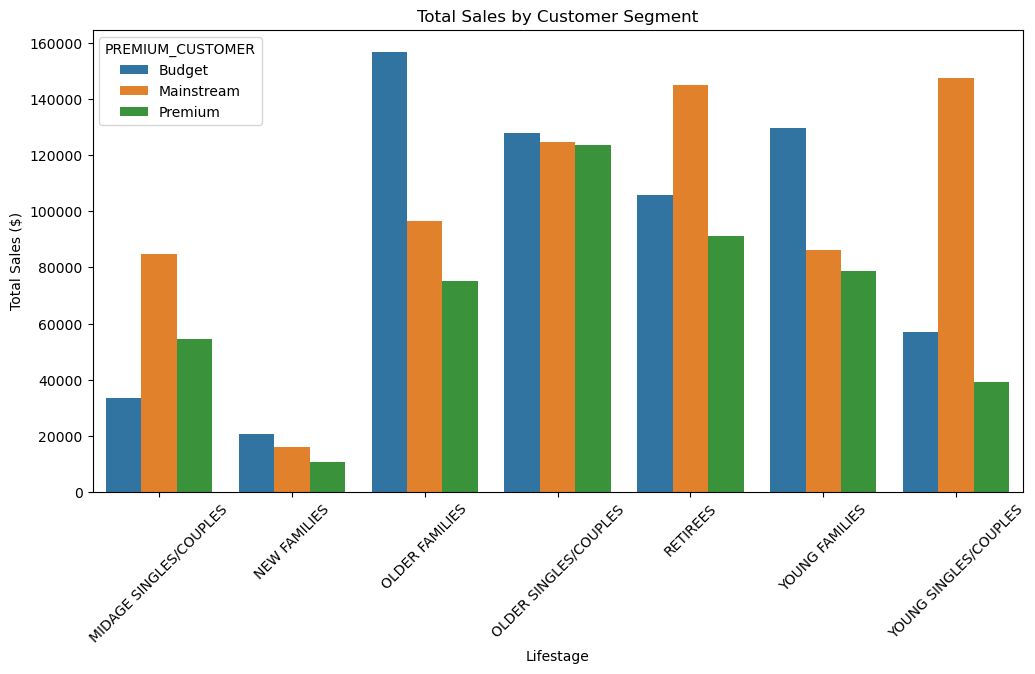

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_spend, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.xticks(rotation=45)
plt.title("Total Sales by Customer Segment")
plt.ylabel("Total Sales ($)")
plt.xlabel("Lifestage")
plt.show()

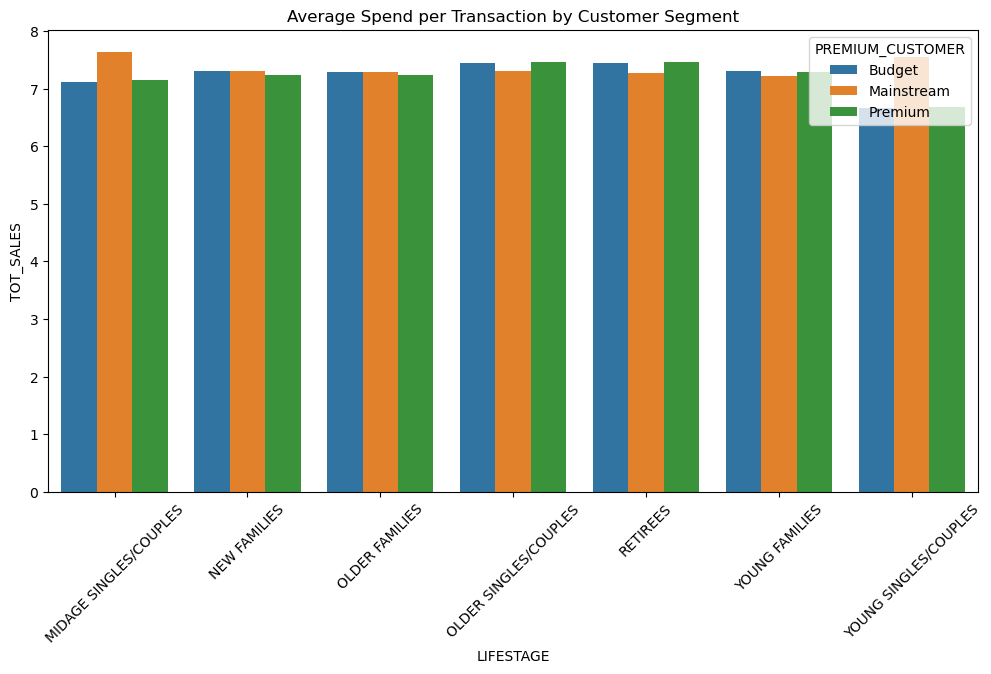

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_avg_spend, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Average Spend per Transaction by Customer Segment')
plt.xticks(rotation=45)
plt.show()

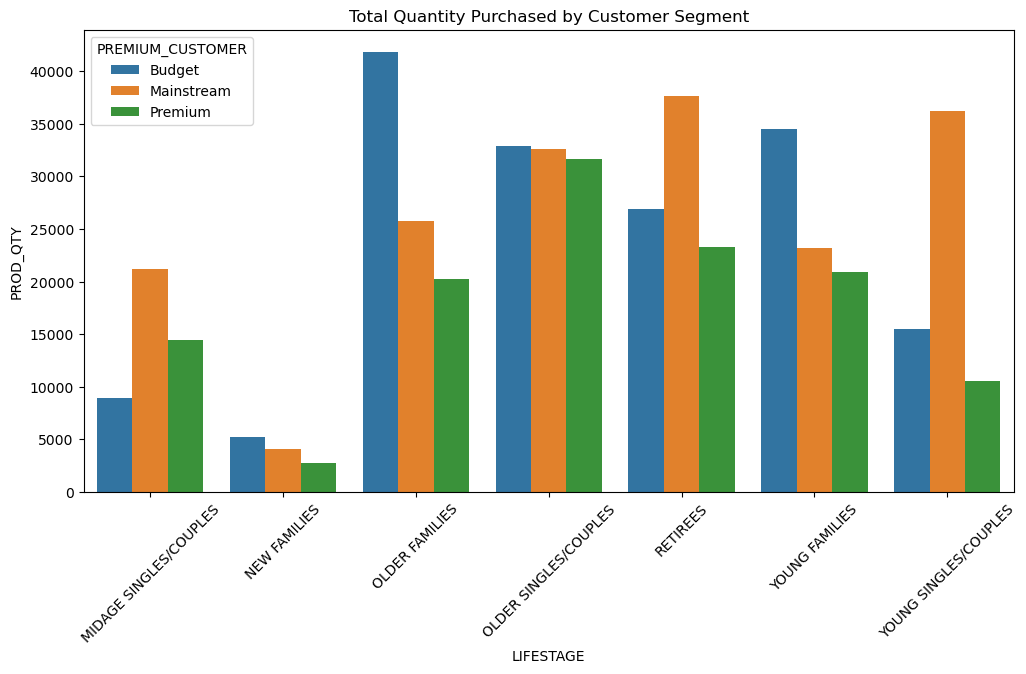

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_quantity, x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER')
plt.title('Total Quantity Purchased by Customer Segment')
plt.xticks(rotation=45)
plt.show()

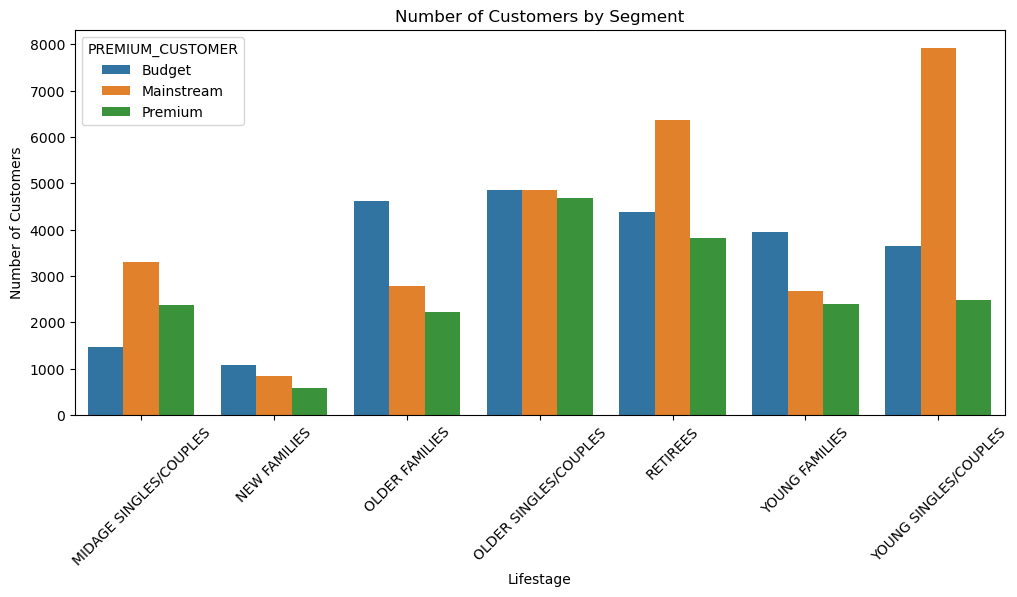

In [55]:
plt.figure(figsize=(12, 5))
sns.barplot(data=customers_by_segment, x='LIFESTAGE', y='LYLTY_CARD_NBR', hue='PREMIUM_CUSTOMER')
plt.xticks(rotation=45)
plt.title("Number of Customers by Segment")
plt.ylabel("Number of Customers")
plt.xlabel("Lifestage")
plt.show()


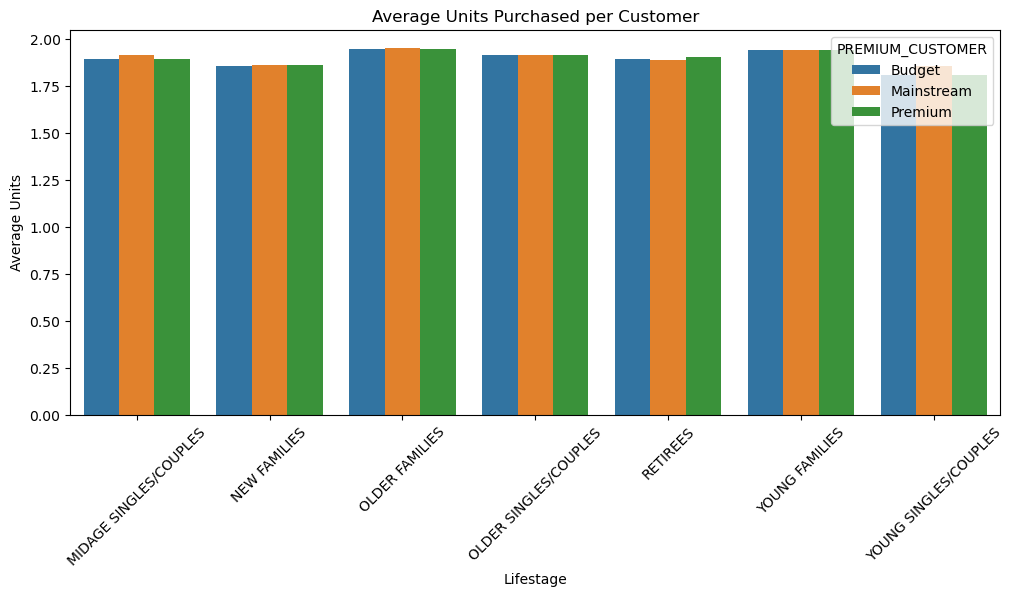

In [56]:
plt.figure(figsize=(12, 5))
sns.barplot(data=units_per_customer, x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER')
plt.xticks(rotation=45)
plt.title("Average Units Purchased per Customer")
plt.ylabel("Average Units")
plt.xlabel("Lifestage")
plt.show()


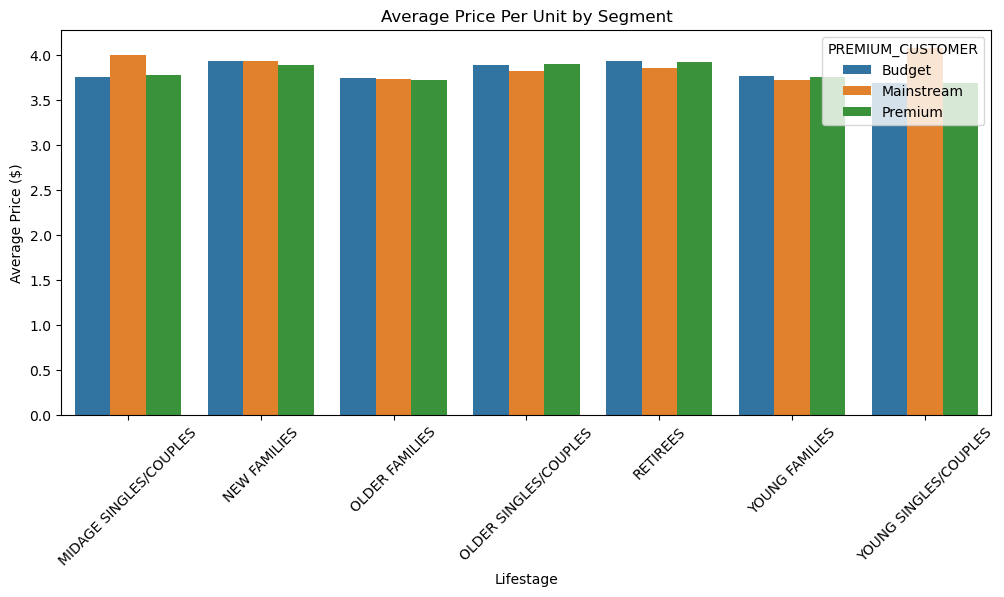

In [57]:
price_per_unit = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum() / merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()

price_per_unit = price_per_unit.reset_index()
price_per_unit.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'AVG_UNIT_PRICE']

# Plotting
plt.figure(figsize=(12, 5))
sns.barplot(data=price_per_unit, x='LIFESTAGE', y='AVG_UNIT_PRICE', hue='PREMIUM_CUSTOMER')
plt.xticks(rotation=45)
plt.title("Average Price Per Unit by Segment")
plt.ylabel("Average Price ($)")
plt.xlabel("Lifestage")
plt.show()


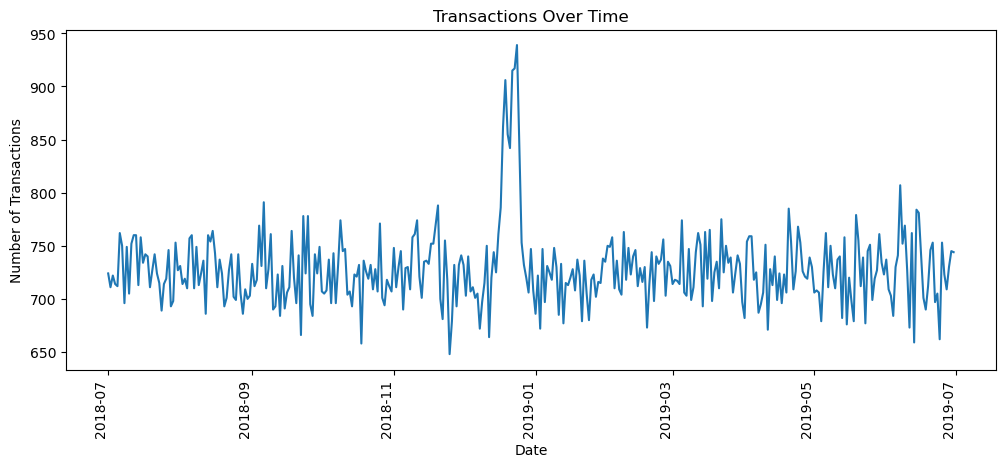

In [58]:
transactions_by_date.plot(kind='line', figsize=(12, 5), title="Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=90)
plt.show()


C:\Users\tinot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


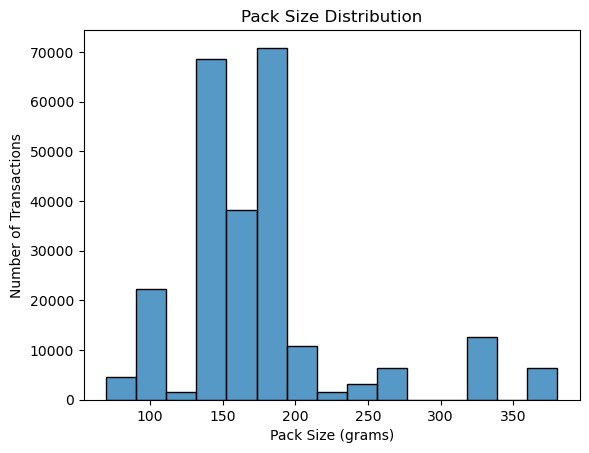

In [59]:
sns.histplot(transaction_data_df['PACK_SIZE'], bins=15, kde=False)
plt.xlabel("Pack Size (grams)")
plt.ylabel("Number of Transactions")
plt.title("Pack Size Distribution")
plt.show()


In [60]:
# T-test for Price Differences
from scipy.stats import ttest_ind

mainstream_prices = merged_df[(merged_df['PREMIUM_CUSTOMER'] == 'Mainstream') & (merged_df['LIFESTAGE'].str.contains("SINGLES|MIDAGE"))]['TOT_SALES'] / merged_df['PROD_QTY']
other_prices = merged_df[~((merged_df['PREMIUM_CUSTOMER'] == 'Mainstream') & (merged_df['LIFESTAGE'].str.contains("SINGLES|MIDAGE")))].copy()
other_prices['UNIT_PRICE'] = other_prices['TOT_SALES'] / other_prices['PROD_QTY']

# Performing t-test
t_stat, p_value = ttest_ind(mainstream_prices.dropna(), other_prices['UNIT_PRICE'].dropna())

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 28.66710505043346, P-value: 1.945541784063699e-180


Next Steps
Affinity analysis for brand preference using association rule mining.
Further investigation of high-spending segments.
Insights and recommendations based on findings.